In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


In [7]:
df.tail(10)

,id,text,author
19569,id26790,Once my fancy was soothed with dreams of virtu...,MWS
19570,id14263,"Nay, you may have met with another whom you ma...",MWS
19571,id14420,"My watch was still going, and told me that the...",HPL
19572,id03325,But these and other difficulties attending res...,EAP
19573,id07567,Stress of weather drove us up the Adriatic Gul...,MWS
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP
19578,id00393,"He laid a gnarled claw on my shoulder, and it ...",HPL


In [8]:
category = pd.get_dummies(df.author)

In [9]:
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='author')
df_baru

,id,text,EAP,HPL,MWS
0,id26305,"This process, however, afforded me no means of...",1,0,0
1,id17569,It never once occurred to me that the fumbling...,0,1,0
2,id11008,"In his left hand was a gold snuff box, from wh...",1,0,0
3,id27763,How lovely is spring As we looked from Windsor...,0,0,1
4,id12958,"Finding nothing else, not even gold, the Super...",0,1,0
...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",1,0,0
19575,id08973,The lids clenched themselves together as if in...,1,0,0
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",1,0,0
19577,id17513,"For an item of news like this, it strikes us i...",1,0,0


In [10]:
text = df_baru['text'].values

In [11]:
label = df_baru[['EAP', 'HPL', 'MWS']].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')

In [16]:
tokenizer.fit_on_texts(text_latih)
tokenizer.fit_on_texts(text_test)

In [17]:
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)

In [18]:
padded_latih = pad_sequences(sekuens_latih, padding='post', maxlen=20, truncating='post') 
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20, truncating='post')

In [19]:
import tensorflow as tf

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')> 0.9) and (logs.get('val_accuracy')> 0.75):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True

In [66]:
callbacks = myCallback()

In [67]:
num_epochs = 100
history = model.fit(padded_latih, label_latih, batch_size=256, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/100
62/62 - 47s - loss: 1.0439 - accuracy: 0.4325 - val_loss: 0.9610 - val_accuracy: 0.5531 - 47s/epoch - 760ms/step
Epoch 2/100
62/62 - 7s - loss: 0.8776 - accuracy: 0.5703 - val_loss: 0.8299 - val_accuracy: 0.5825 - 7s/epoch - 116ms/step
Epoch 3/100
62/62 - 7s - loss: 0.7564 - accuracy: 0.6219 - val_loss: 0.8328 - val_accuracy: 0.5981 - 7s/epoch - 115ms/step
Epoch 4/100
62/62 - 7s - loss: 0.7033 - accuracy: 0.6417 - val_loss: 0.8163 - val_accuracy: 0.6075 - 7s/epoch - 109ms/step
Epoch 5/100
62/62 - 7s - loss: 0.6631 - accuracy: 0.6709 - val_loss: 0.8528 - val_accuracy: 0.6290 - 7s/epoch - 111ms/step
Epoch 6/100
62/62 - 7s - loss: 0.6058 - accuracy: 0.7329 - val_loss: 0.8612 - val_accuracy: 0.6818 - 7s/epoch - 114ms/step
Epoch 7/100
62/62 - 7s - loss: 0.5239 - accuracy: 0.7977 - val_loss: 0.8514 - val_accuracy: 0.7245 - 7s/epoch - 111ms/step
Epoch 8/100
62/62 - 7s - loss: 0.4054 - accuracy: 0.8493 - val_loss: 1.0015 - val_accuracy: 0.7257 - 7s/epoch - 113ms/step
Epoch 9/100
62

In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Text(0.5, 1.0, 'Loss training dan validation')

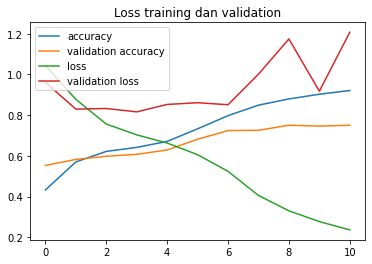

In [69]:
# Evaluasi Hasil

# Accuracy dan validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss dan validation
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Accuracy & validation plot
plt.plot(epochs, acc, label="accuracy")
plt.plot(epochs, val_acc, label="validation accuracy")
plt.title('Akurasi Training dan Validation')
plt.legend(loc="upper left")

# Loss & validation plot
plt.plot(epochs, loss, label="loss")
plt.plot(epochs, val_loss, label="validation loss")
plt.legend(loc="upper left")
plt.title('Loss training dan validation')